## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits = load_digits() # 8 x 8 = 64 píxeles  type()

In [7]:
import pandas as pd
pd.__version__

'1.5.3'

#### Now that you have the dataset loaded you can use the commands below

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
print("image shape", digits.data.shape)
print("label data shape", digits.target.shape)

image shape (1797, 64)
label data shape (1797,)


#### Check the dataset

In [10]:
import pandas as pd
df = pd.DataFrame(data=np.c_[digits['data'], digits['target']])
# c_ añade columnas en el último eje del tamaño del primer argumento, por lo que une el target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [11]:
df[df[64] == 1]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
42,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,8.0,0.0,0.0,1.0
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.0,0.0,4.0,10.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,10.0,0.0,0.0,0.0,1.0
1757,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,2.0,0.0,0.0,1.0
1760,0.0,0.0,1.0,12.0,10.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.0,12.0,10.0,0.0,0.0,1.0
1766,0.0,0.0,8.0,12.0,11.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,11.0,12.0,7.0,0.0,0.0,1.0


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


#### Check the target

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
digits.target[0:50] # target = objetivo = "para entendernos, la y, lo que quieres predecir"

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

#### Plot some numbers

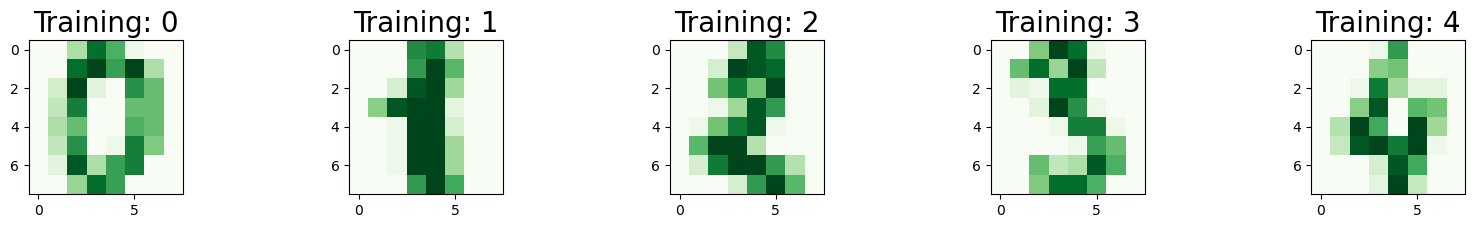

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))

for index, (image, label) in     enumerate(     zip(      digits.data[0:5], digits.target[0:5]     )):
    plt.subplot(1,5, index+1) # 1 fila, 5 columnas, elemento
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.Greens)
    plt.title("Training: " + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size= 0.25,
                                                   random_state = 42)
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="liblinear", multi_class = "auto")
logisticRegr.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

### To predict

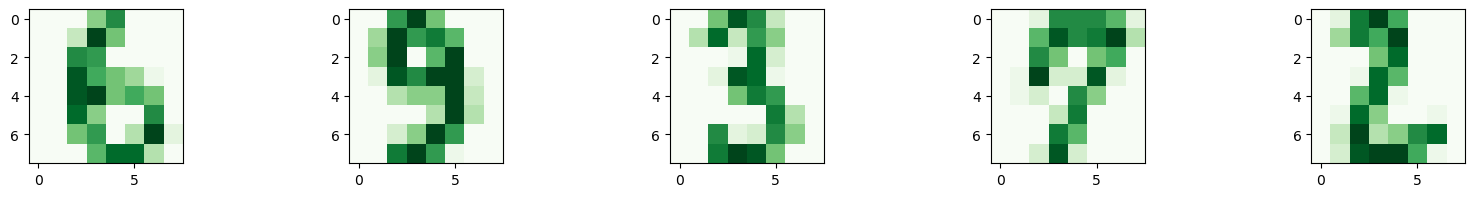

In [15]:
plt.figure(figsize=(20,2))

for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1,5, index+1) # 1 fila, 5 columnas, elemento
    plt.imshow(np.reshape(image, (8,8)), cmap= plt.cm.Greens)

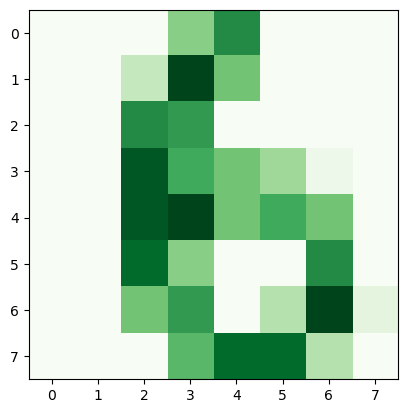

In [16]:
first_test_image = X_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.Greens)

In [17]:
X_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [18]:
X_test[0].reshape(1,-1) # una fila

array([[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.]])

In [19]:
X_test

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  6., 16., ...,  0.,  0.,  0.]])

In [20]:
# voy a predecir una imagen
logisticRegr.predict(X_test[0].reshape(1,-1)) # necesita el tamaño de una fila, me peredice la etiqueta 6

array([6])

In [21]:
y_test.shape

(450,)

In [22]:
y_test[0:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [24]:
logisticRegr.predict(X_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [25]:
y_test[52]

9

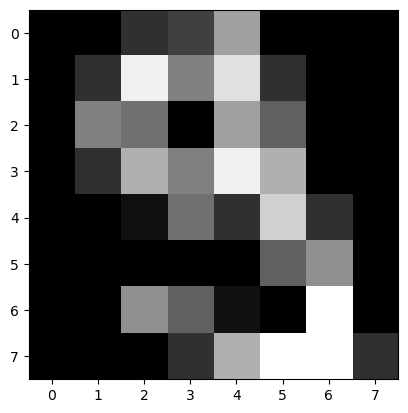

In [26]:
first_test_image = X_test[52]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [27]:
logisticRegr.predict(X_test[52].reshape(1,-1))

array([9])

### Measuring Model Performance (Digits Dataset)

In [28]:
score = logisticRegr.score(X_test, y_test)
print(np.round(score*100,2), "%")

96.67 %


### Matriz de confusión

In [29]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 56,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 45]], dtype=int64)

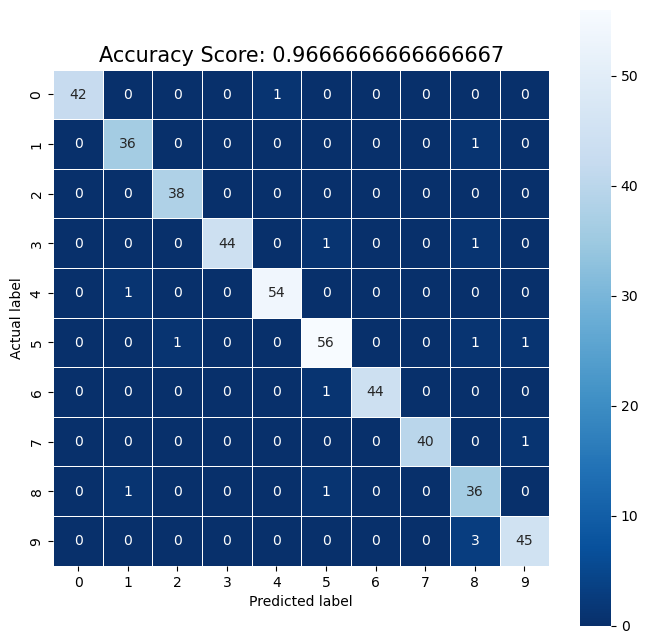

In [30]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

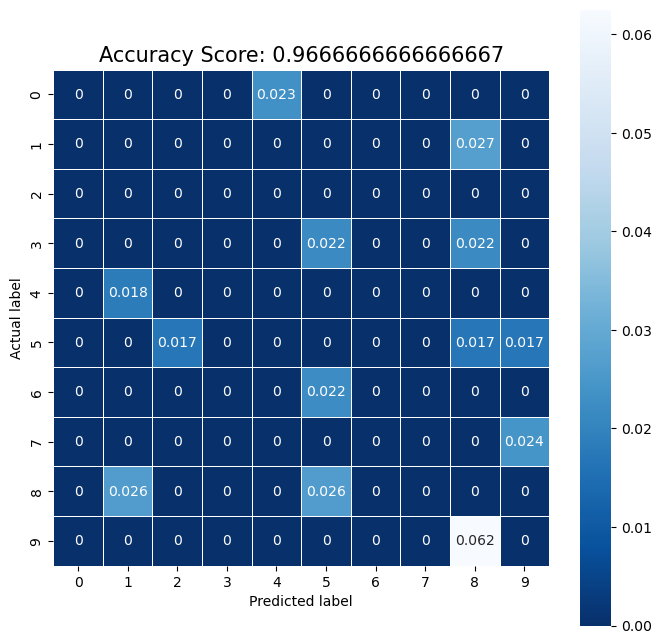

In [31]:
row_sums = cm.sum(axis=1, keepdims=True) # sumo por filas y me queda una columna
norm_conf_mx = cm / row_sums # normalizo por filas
np.fill_diagonal(norm_conf_mx, 0) # no me interesan las que acierto

plt.figure(figsize=(8,8))
sns.heatmap(norm_conf_mx, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);